In [190]:
%reload_ext autoreload
%autoreload 2

In [191]:
import torch
import torchvision

In [192]:
parse_args

NameError: name 'parse_args' is not defined

In [ ]:
a = { "a": 10, "b": "bb"}
b = {"a": 20, "b": "CC", "c": 20}

a.update(b)
a

In [ ]:
a = {'b64_image': 'aa', 'dataset_mode': 'single', 'model': 'test'}

In [ ]:
b = {'b64_image': 'aa', 'dataset_mode': 'unaligned', 'model': 'cycle_gan', 'dataroot': '/datasets/horse2zebra', 'checkpoints_dir': '/cache/ckpts', 'netD': 'basic', 'netG': 'resnet_9blocks', 'norm': 'instance', 'init_type': 'normal', 'init_gain': 0.02, 'no_dropout': True, 'direction': 'AtoB', 'num_threads': 4, 'batch_size': 4, 'max_dataset_size': 1024, 'no_flip': True, 'print_freq': 2, 'save_latest_freq': 20, 'continue_train': True, 'beta1': 0.5, 'lr': 0.002, 'lr_policy': 'linear', 'lr_decay_iters': 10, 'n_epochs': 120, 'gan_mode': 'lsgan', 'verbose': True}
b

In [ ]:
a.update(b)
a

In [ ]:

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(39)

depth = [i * 10 + 8000 for i in range(100)]
l = len(depth)
avg_por = []
p10_por = []
p90_por = []
for i, item in enumerate(depth):

    # You collect 12 rock core samples for each depth
    # Assume that sample porosity follows a normal distribution
    sample_size = 12
    por_samples = np.random.normal(loc=0.15 - i/2000, scale=0.022, size=sample_size)
    avg_por.append(np.mean(por_samples))

    # 80% confidence interval of mean
    p10, p90 = stats.t.interval(1 - 0.2, sample_size - 1, loc=np.mean(por_samples), scale=stats.sem(por_samples))
    p10_por.append(p10)
    p90_por.append(p90)
    raise 

# plotting
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(avg_por[:l//2], depth[:l//2], 'k', label='P50', alpha=0.8)
ax[0].plot(p10_por[:l//2], depth[:l//2], 'grey', linewidth=0.7, label='P10', linestyle='--')
ax[0].plot(p90_por[:l//2], depth[:l//2], 'grey', linewidth=0.7, label='P90')

ax[0].set_xlim(0.08, 0.17)
ax[0].set_ylabel('Depth (ft)', fontsize=15)
ax[0].set_xlabel('Porosity', fontsize=15)
ax[0].fill_betweenx(depth[:l//2], p10_por[:l//2], p90_por[:l//2], facecolor='lightgrey', alpha=0.3)
ax[0].invert_yaxis()

ax[1].plot(avg_por[l//2:], depth[l//2:], 'k', label='P50', alpha=0.8)
ax[1].plot(p10_por[l//2:], depth[l//2:], 'grey', linewidth=0.7, label='P10', linestyle='--')
ax[1].plot(p90_por[l//2:], depth[l//2:], 'grey', linewidth=0.7, label='P90')

ax[1].set_xlim(0.08, 0.17)
ax[1].set_xlabel('Porosity', fontsize=15)
ax[1].legend(loc='best', fontsize=14, framealpha=1, frameon=True)
ax[1].fill_betweenx(depth[l//2:], p10_por[l//2:], p90_por[l//2:], facecolor='lightgrey', alpha=0.3)
ax[1].invert_yaxis()

In [ ]:
stats.t.interval()
stats.sem()

In [ ]:
import json

In [ ]:
%config IPCompleter.use_jedi = False  

In [ ]:
json.decoder

In [ ]:
import Ipython

In [ ]:
package main

import "testing"

func array() [1024]int {
    var x [1024]int
    for i := 0; i < len(x); i++ {
        x[i] = i
    }
    return x
}

func slice() []int {
    x := make([]int, 1024)
    for i := 0; i < len(x); i++ {
        x[i] = i
    }
    return x
}

func BenchmarkArray(b *testing.B) {
    for i := 0; i < b.N; i++ {
        array()
    }
}

func BenchmarkSlice(b *testing.B) {
    for i := 0; i < b.N; i++ {
        slice()
    }
}

In [ ]:
import torch
import IPython

%config IPCompleter.use_jedi = False

In [ ]:
a = torch.rand((3,2))
b = a[:, None, :]
a.shape, b.shape

In [ ]:
a

In [ ]:
a[None]

In [ ]:
c = torch.rand((1, 3))
c

In [ ]:
c[:, None]

In [ ]:
def box_iou(box1, box2):
    # https://github.com/pytorch/vision/blob/master/torchvision/ops/boxes.py
    """
    Return intersection-over-union (Jaccard index) of boxes.
    Both sets of boxes are expected to be in (x1, y1, x2, y2) format.
    Arguments:
        box1 (Tensor[N, 4])
        box2 (Tensor[M, 4])
    Returns:
        iou (Tensor[N, M]): the NxM matrix containing the pairwise
            IoU values for every element in boxes1 and boxes2
    """

    def box_area(box):
        # box = 4xn
        return (box[2] - box[0]) * (box[3] - box[1])

    area1 = box_area(box1.T)
    print(area1.shape)
    area2 = box_area(box2.T)
    print(area2.shape)

    # inter(N,M) = (rb(N,M,2) - lt(N,M,2)).clamp(0).prod(2)
    inter = (torch.min(box1[:, None, 2:], box2[:, 2:]) - torch.max(box1[:, None, :2], box2[:, :2])).clamp(0).prod(2)
    return inter / (area1[:, None] + area2 - inter), area1, area2

In [ ]:
a = torch.randint(5, 15, (10, 4))
c = torch.randint(5, 15, (10, 4))
a

In [ ]:
b = torch.randint(5, 15, (20, 4))
b

In [ ]:
a[:, None, 2:], b[:, 2:]

In [ ]:
torch.min(a[:, None, 2:], b[:, 2:])

In [ ]:
e,f,g = box_iou(a, b)

In [ ]:
f, g

In [ ]:
n = f[:, None]
n.T

In [ ]:
m = f[:, None] + g
m.shape

In [ ]:
a = torch.randn(4, 3, 4)
a

In [ ]:
a

In [ ]:
a[:, 2], a[..., 2], a[:, :, 2]


In [ ]:
a[..., 2] > 0.4

In [ ]:
import numpy as np


In [ ]:
a = np.random.randint(0, 10, (3 ,4, 5))
a

In [ ]:
import cv2

import matplotlib.pyplot as plt

In [ ]:
!ls assets

In [205]:
def letterbox(img, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = img.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better test mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    print(ratio)
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    print(new_unpad)
    if shape[::-1] != new_unpad:  # resize
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return img, ratio, (dw, dh)


(480, 640, 3)
(1.0, 1.0)
(640, 480)
0 0
(480, 640, 3) (1.0, 1.0) 0.0 0.0


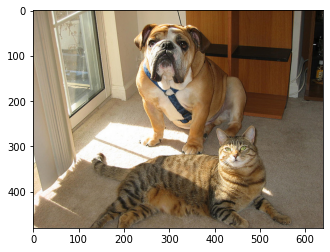

In [210]:
test = cv2.imread('assets/cat_dog.jpg')
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
# img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color

print(test.shape)
test, ratio, (dw, dh) = letterbox(test)
print(test.shape, ratio, dw, dh)
plt.imshow(test)

In [ ]:
img = cv2.copyMakeBorder(test, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=128)

plt.imshow(img)

In [193]:
a[a[..., 2] > 0.4]

array([[2, 6, 6, 7, 6],
       [3, 2, 4, 9, 3],
       [5, 2, 4, 5, 7],
       [6, 8, 7, 2, 7],
       [7, 2, 4, 2, 8],
       [2, 0, 2, 8, 6],
       [0, 1, 2, 0, 8],
       [6, 7, 9, 1, 8],
       [7, 6, 7, 7, 2],
       [0, 7, 8, 0, 8],
       [8, 1, 9, 0, 0]])